# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, MakeBinomialPmf
import thinkplot

import numpy as np

## The dinner party

Suppose you are having a dinner party with 10 guests and 4 of them are allergic to cats.  Because you have cats, you expect 50% of the allergic guests to sneeze during dinner.  At the same time, you expect 10% of the non-allergic guests to sneeze.  What is the distribution of the total number of guests who sneeze?

In [14]:
# Solution

n_allergic = 4
n_non = 6
p_allergic = 0.5
p_non = 0.1

0.1

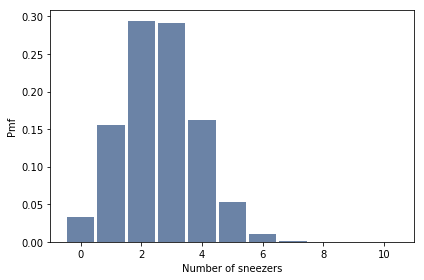

In [15]:
# Solution

pmf1 = MakeBinomialPmf(n_allergic, p_allergic)
pmf2 = MakeBinomialPmf(n_non, p_non)
pmf = pmf1 + pmf2
thinkplot.Hist(pmf)
thinkplot.decorate(xlabel='Number of sneezers',
                   ylabel='Pmf')

In [16]:
# Solution

pmf.Mean()

2.6000000000000014

## The Gluten Problem

[This study from 2015](http://onlinelibrary.wiley.com/doi/10.1111/apt.13372/full) showed that many subjects diagnosed with non-celiac gluten sensitivity (NCGS) were not able to distinguish gluten flour from non-gluten flour in a blind challenge.

Here is a description of the study:

>"We studied 35 non-CD subjects (31 females) that were on a gluten-free diet (GFD), in a double-blind challenge study. Participants were randomised to receive either gluten-containing ﬂour or gluten-free ﬂour for 10 days, followed by a 2-week washout period and were then crossed over. The main outcome measure was their ability to identify which ﬂour contained gluten.

>"The gluten-containing ﬂour was correctly identiﬁed by 12 participants (34%)..."
Since 12 out of 35 participants were able to identify the gluten flour, the authors conclude "Double-blind gluten challenge induces symptom recurrence in just one-third of patients fulﬁlling the clinical diagnostic criteria for non-coeliac gluten sensitivity."

This conclusion seems odd to me, because if none of the patients were sensitive to gluten, we would expect some of them to identify the gluten flour by chance.  So the results are consistent with the hypothesis that none of the subjects are actually gluten sensitive.

We can use a Bayesian approach to interpret the results more precisely.  But first we have to make some modeling decisions.

1. Of the 35 subjects, 12 identified the gluten flour based on resumption of symptoms while they were eating it.  Another 17 subjects wrongly identified the gluten-free flour based on their symptoms, and 6 subjects were unable to distinguish.  So each subject gave one of three responses.  To keep things simple I follow the authors of the study and lump together the second two groups; that is, I consider two groups: those who identified the gluten flour and those who did not.

2. I assume (1) people who are actually gluten sensitive have a 95% chance of correctly identifying gluten flour under the challenge conditions, and (2) subjects who are not gluten sensitive have only a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other flour or failing to distinguish).

Using this model, estimate the number of study participants who are sensitive to gluten.  What is the most likely number?  What is the 95% credible interval?

In [17]:
# Solution

# Here's a class that models the study

class Gluten(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the probability of the data under the hypothesis.
        
        data: tuple of (number who identified, number who did not)
        hypothesis: number of participants who are gluten sensitive
        """
        # compute the number who are gluten sensitive, `gs`, and
        # the number who are not, `ngs`
        gs = hypo
        yes, no = data
        n = yes + no
        ngs = n - gs
        
        pmf1 = MakeBinomialPmf(gs, 0.95)
        pmf2 = MakeBinomialPmf(ngs, 0.4)
        pmf = pmf1 + pmf2
        return pmf[yes]

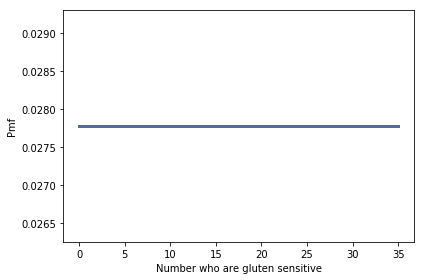

In [18]:
# Solution

prior = Gluten(range(0, 35+1))
thinkplot.Pdf(prior)
thinkplot.decorate(xlabel='Number who are gluten sensitive',
                   ylabel='Pmf')

In [19]:
# Solution

posterior = prior.Copy()
data = 12, 23
posterior.Update(data)

0.013207615690597462

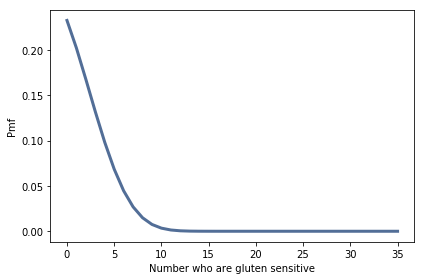

In [20]:
# Solution

thinkplot.Pdf(posterior)
thinkplot.decorate(xlabel='Number who are gluten sensitive',
                   ylabel='Pmf')

In [21]:
# Solution

posterior.CredibleInterval(95)

(0, 8)